# One step learning

Generate lots of data (100 time-series) and use it to train one-step models.

In [3]:
import sys
sys.path.append("./source")

import pandas as pd
import NovakTyson
import numpy as np

In [5]:
# Number of time series to generate
N = 100

time_points, dummy = NovakTyson.simulate_default()
data_numpy = np.zeros((100, dummy.shape[1], dummy.shape[2]))
# print(data_numpy.shape)

cyclin_list = np.random.uniform(0, 22, N)
mpf_list = 
for i in range(N):
    _, data_numpy[i, :, :] = NovakTyson.simulate_custom(cdc25_total=2, tlast=1500, k1=0, v2_1=0, v2_2=0)

(100, 7500, 7)


# End to end demo of one-step learning and LmmNet

Keep in mind the following for the cell cycle model:
* The system consists of 7 biochemical species
* The data array is a 3D tensor (in the case of LmmNet)

In [1]:
import sys
sys.path.append("./source")
from train import *
from predict import *
from model import *
import pickle

from NovakTyson import *
import matplotlib.pyplot as plt

In [2]:
# load data
with open('./data/cell_cycle.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    
data_array = data_dict['data']
time_points = data_dict['t']
print(data_array.shape)

(1, 7500, 7)


In [7]:
# train the model

epochs = 10000
step_size = time_points[1] - time_points[0]
net = lmmNet(step_size, data_array, M = 1, scheme='AM', hidden_units=256) # use trapezoidal rule (smallest error constant that is also stable)
net.train(epochs)

In [8]:
# Solve the initial value problem given initial concentrations

predicted_traj = odeint(lambda x, t: predict_fn(x, t, net), data_array[0, 0,:], time_points)

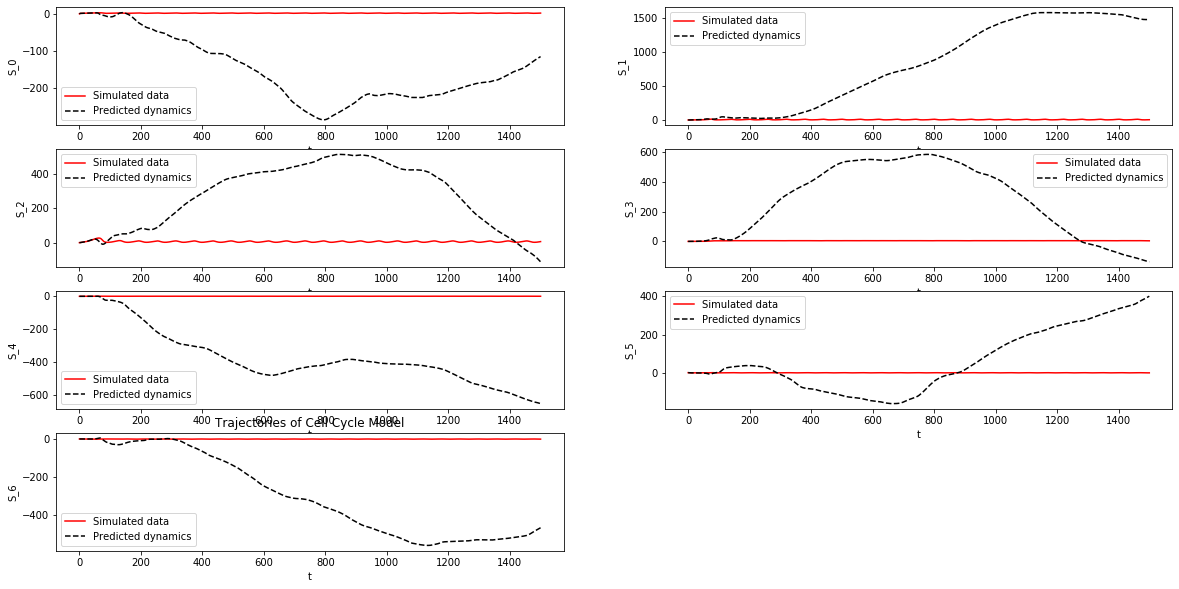

In [11]:
import matplotlib.pyplot as plt

# plot and compare the predicted and true dynamics

plt.figure(figsize=(20, 10))
plt.title('Trajectories of Cell Cycle Model')

for species in range(7):
    plt.subplot(4,2,species + 1)
    plt.plot(time_points, data_array[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, predicted_traj[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.show()

Now try to use a different step size.

In [18]:
# train the model
time_points, data_array = simulate_custom(step_size=0.55)

epochs = 10000
step_size = time_points[1] - time_points[0]
net = lmmNet(step_size, data_array, M = 1, scheme='AM', hidden_units=256) # use trapezoidal rule (smallest error constant that is also stable)
net.train(epochs, debug=False)

# Solve the initial value problem given initial concentrations
predicted_traj = odeint(lambda x, t: predict_fn(x, t, net), data_array[0, 0,:], time_points)

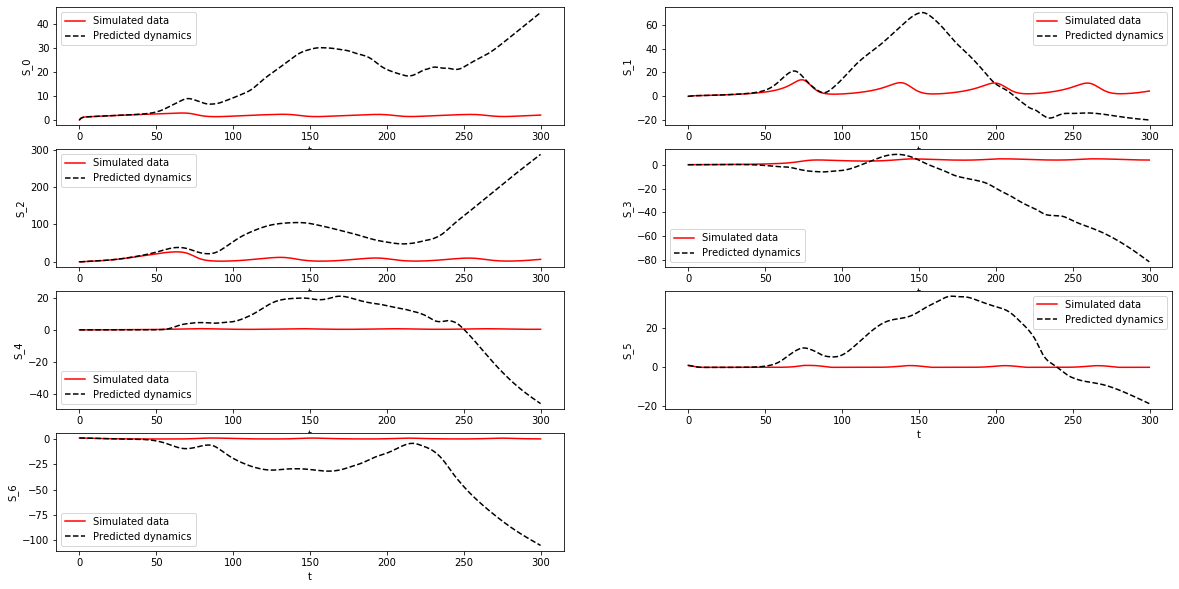

In [19]:
# plot and compare the predicted and true dynamics

plt.figure(figsize=(20, 10))
plt.title('Trajectories of Cell Cycle Model')

for species in range(7):
    plt.subplot(4,2,species + 1)
    plt.plot(time_points, data_array[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, predicted_traj[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.show()

In [22]:
# train the model
time_points, data_array = simulate_custom(step_size=3., tlast=1500)

epochs = 10000
step_size = time_points[1] - time_points[0]
net = lmmNet(step_size, data_array, M = 1, scheme='AM', hidden_units=256) # use trapezoidal rule (smallest error constant that is also stable)
net.train(epochs, debug=False)

# Solve the initial value problem given initial concentrations
predicted_traj = odeint(lambda x, t: predict_fn(x, t, net), data_array[0, 0,:], time_points)

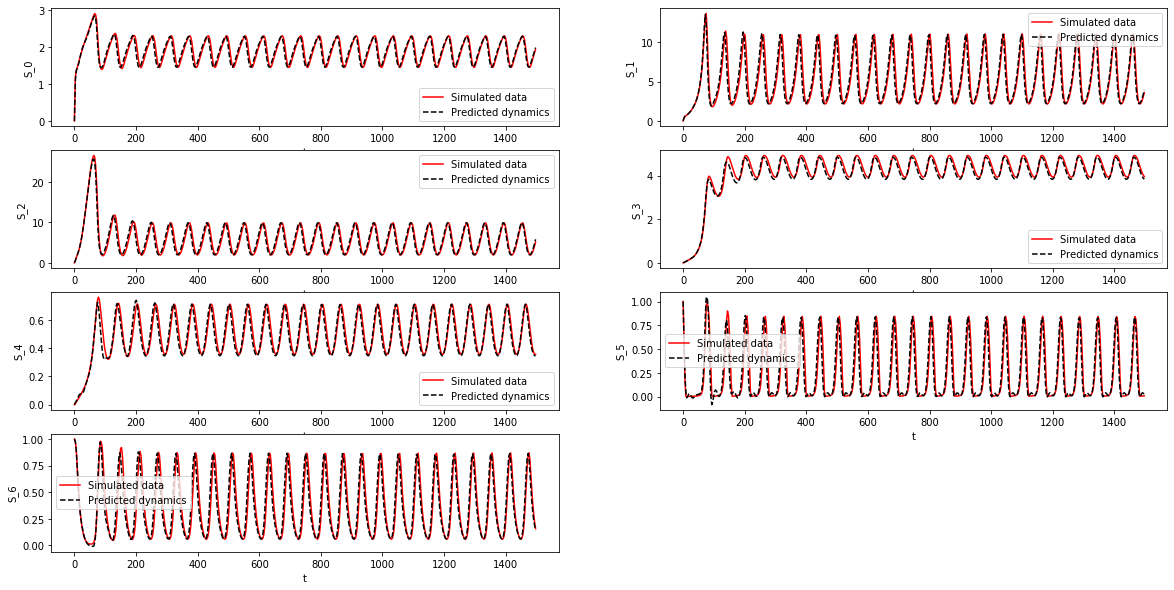

In [23]:
# plot and compare the predicted and true dynamics

plt.figure(figsize=(20, 10))
plt.title('Trajectories of Cell Cycle Model')

for species in range(7):
    plt.subplot(4,2,species + 1)
    plt.plot(time_points, data_array[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, predicted_traj[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.show()